In [73]:
import pandas as pd

In [74]:
import numpy as np

In [103]:
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.decomposition import PCA

In [76]:
df_segmentation = pd.read_csv("segmentation data.csv",index_col=0)

In [77]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [78]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [79]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


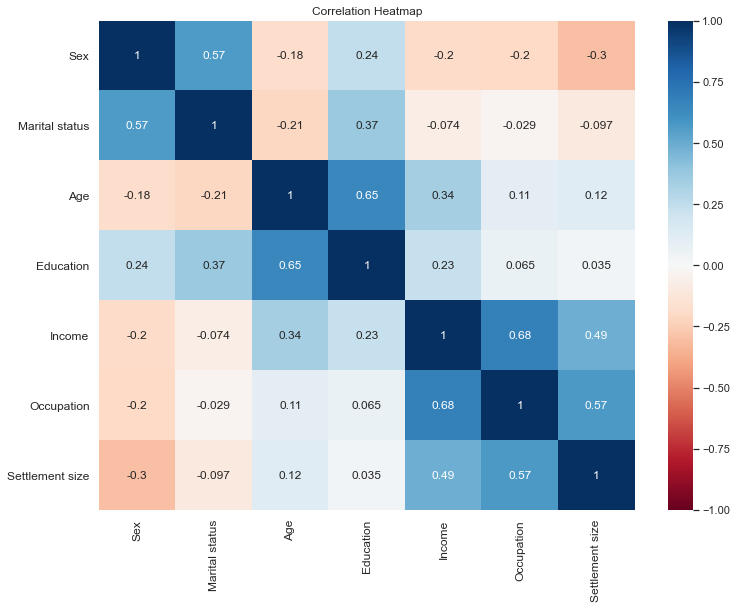

In [80]:
plt.figure(figsize=(12,9))
s=sns.heatmap(df_segmentation.corr(),cmap='RdBu',vmin=-1,vmax=1,annot=True)
s.set_yticklabels(s.get_yticklabels(),rotation=0,fontsize=12)
s.set_xticklabels(s.get_xticklabels(),rotation=90,fontsize=12)
plt.title("Correlation Heatmap")
plt.show()

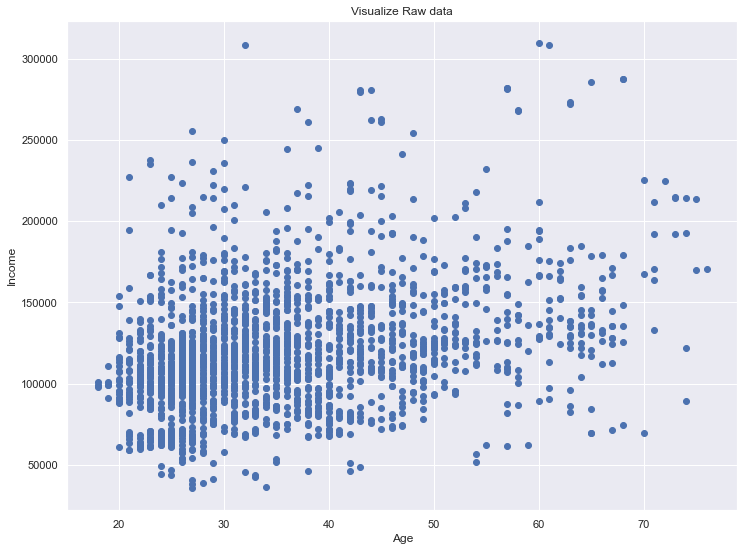

In [81]:
plt.figure(figsize=(12,9))
plt.scatter(df_segmentation.iloc[:,2],df_segmentation.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title("Visualize Raw data")
plt.show()

In [82]:
scaler=StandardScaler()
segmentation_std=scaler.fit_transform(df_segmentation)

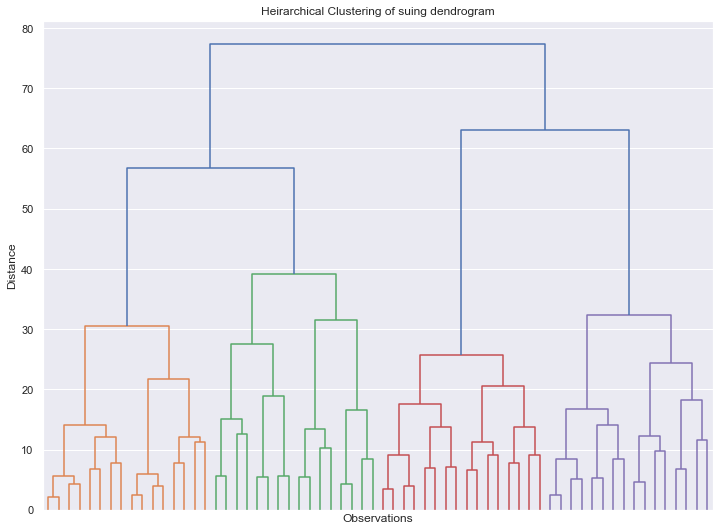

In [83]:
heir_clust = linkage(segmentation_std,method='ward')
plt.figure(figsize=(12,9))
plt.title('Heirarchical Clustering of suing dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(heir_clust,show_leaf_counts=False,no_labels=True,truncate_mode='level',p=5)#removing color_threshold=0 show colors.
plt.show()

In [84]:
wcss = []
for i in range (1,11):
    Kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    Kmeans.fit(segmentation_std)
    wcss.append(Kmeans.inertia_)
    

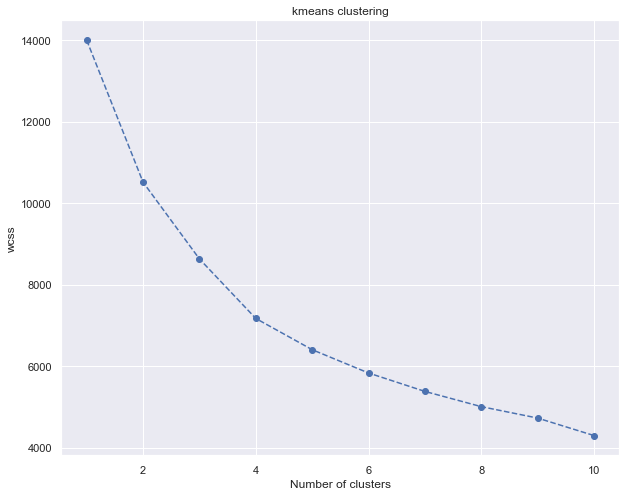

In [85]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.title('kmeans clustering')
plt.show()

In [86]:
Kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
Kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

In [87]:
df_segm_kmeans=df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = Kmeans.labels_


In [88]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [93]:
df_segm_analysis['No Obs'] =df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()

In [94]:
df_segm_analysis['Prop Obs']=df_segm_analysis['No Obs']/df_segm_analysis['No Obs'].sum()

In [95]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,No Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [96]:
df_segm_analysis.rename({0:'well-off',
                        1: 'fewer-oppurtunities',
                        2: 'standard',
                        3: 'Career Focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,No Obs,Prop Obs
Segment K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-oppurtunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
Career Focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [100]:
df_segm_kmeans['Labels']=df_segm_kmeans['Segment K-means'].map({0:'well-off',
                                                               1: 'fewer-oppurtunities',
                                                                2: 'standard',
                                                                3: 'Career Focused'})

/Users/vanshikathakur/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


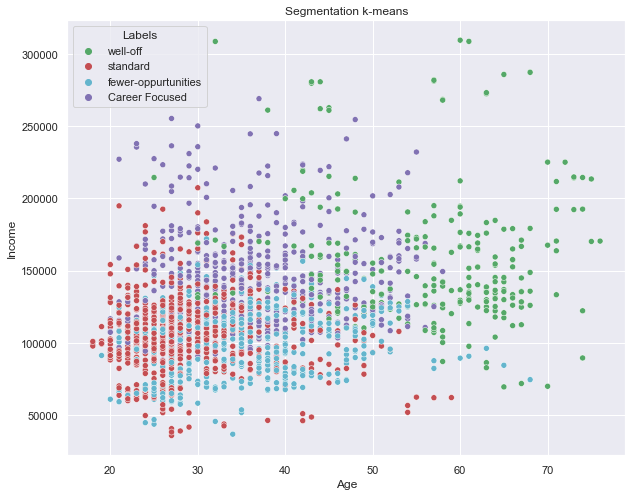

In [102]:
x_axis=df_segm_kmeans['Age']
y_axis=df_segm_kmeans['Income']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_kmeans['Labels'],palette=['g','r','c','m'])
plt.title('Segmentation k-means')
plt.show()

In [104]:
pca=PCA()


In [105]:
pca.fit(segmentation_std)

PCA()

In [106]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumulative Explained Variance')

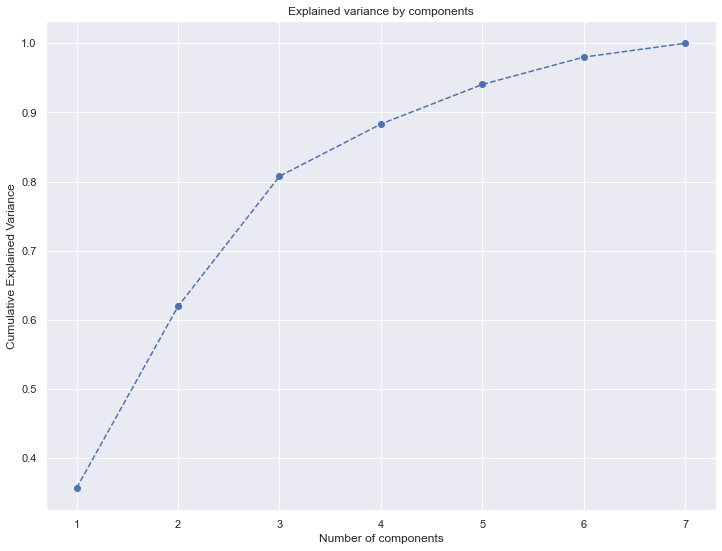

In [107]:
plt.figure(figsize=(12,9))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')

In [108]:
pca=PCA(n_components=3)
pca.fit(segmentation_std)

PCA(n_components=3)